In [14]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [15]:
dataset_path = '.\ACDC\database'
testing_folder = os.path.join(dataset_path, 'testing')
training_folder = os.path.join(dataset_path, 'training')

In [16]:
def nii_reader(path):
    nii = nib.load(path)
    return nii.get_fdata()

def visualize_image_mask(image, mask):
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(image, cmap='gray')
    ax[1].imshow(mask, cmap='gray')
    plt.show()

In [17]:
nb_training = len(os.listdir(training_folder))
nb_testing = len(os.listdir(testing_folder))

In [40]:
import re

def preprocess_files_acdc(folder, nb_files):
    images_ED = []
    images_ES = []
    masks_ED = []
    masks_ES = []

    for i in range(1, nb_files + 1):
        files_folder = []
        patient_folder = os.path.join(folder, 'patient' + str(i).zfill(3))
        print('Patient folder:', patient_folder)

        # let's see the files ending with .nii.gz that are in the folder
        for file in os.listdir(patient_folder):
            if file.endswith('.nii.gz'):
                files_folder.append(file)

        print('Files found:', files_folder)

        # let's read the files
        for file in files_folder:
            if 'gt' in file:
                if 'frame' in file:
                    match = re.search(r'frame(\d+)', file) 
                    frame_number = int(match.group(1))
                    if frame_number == 1:
                        masks_ED.append(os.path.join(patient_folder, file))
                    else:
                        masks_ES.append(os.path.join(patient_folder, file))
            else:
                if 'frame' in file:
                    match = re.search(r'frame(\d+)', file)
                    frame_number = int(match.group(1))
                    if frame_number == 1:
                        images_ED.append(os.path.join(patient_folder, file))
                    else:
                        images_ES.append(os.path.join(patient_folder, file))

    return images_ED, masks_ED, images_ES, masks_ES

In [43]:
images_ED, masks_ED, images_ES, masks_ES = preprocess_files_acdc(training_folder, nb_training)

Patient folder: .\ACDC\database\training\patient001
Files found: ['patient001_4d.nii.gz', 'patient001_frame01.nii.gz', 'patient001_frame01_gt.nii.gz', 'patient001_frame12.nii.gz', 'patient001_frame12_gt.nii.gz']
Patient folder: .\ACDC\database\training\patient002
Files found: ['patient002_4d.nii.gz', 'patient002_frame01.nii.gz', 'patient002_frame01_gt.nii.gz', 'patient002_frame12.nii.gz', 'patient002_frame12_gt.nii.gz']
Patient folder: .\ACDC\database\training\patient003
Files found: ['patient003_4d.nii.gz', 'patient003_frame01.nii.gz', 'patient003_frame01_gt.nii.gz', 'patient003_frame15.nii.gz', 'patient003_frame15_gt.nii.gz']
Patient folder: .\ACDC\database\training\patient004
Files found: ['patient004_4d.nii.gz', 'patient004_frame01.nii.gz', 'patient004_frame01_gt.nii.gz', 'patient004_frame15.nii.gz', 'patient004_frame15_gt.nii.gz']
Patient folder: .\ACDC\database\training\patient005
Files found: ['patient005_4d.nii.gz', 'patient005_frame01.nii.gz', 'patient005_frame01_gt.nii.gz', '

In [42]:
print('Number of images ED: ', len(images_ED))
print('Number of masks ED: ', len(masks_ED))

print('Number of images ES: ', len(images_ES))
print('Number of masks ES: ', len(masks_ES))

Number of images ED:  99
Number of masks ED:  99
Number of images ES:  101
Number of masks ES:  101


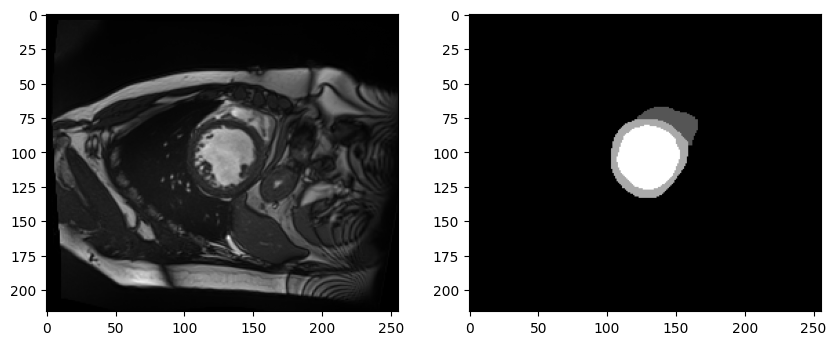

In [39]:
patient = 0
slice = 5

image = nii_reader(images_ED[patient])
mask = nii_reader(masks_ED[patient])

visualize_image_mask(image[:, :, slice], mask[:, :, slice])